In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
from sklearn.preprocessing import MinMaxScaler

In [17]:
df = pd.read_csv("DataCleanLabel.csv")
df_cluster = pd.read_csv("DataClustering.csv")
display(df)
display(df_cluster) 
df["Cluster"] = df_cluster["Cluster"]

Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2059       0  20.976842  1.710730  131.408528                               1   
2060       0  21.982942  1.748584  133.742943                               1   
2061       0  22.524036  1.752206  133.689352                               1   
2062       0  24.361936  1.739450  133.346641                               1   
2063       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0        0   2.0  3.0     2      0  2.000000    0  0.000000  1.000000     3   
1        0   3.0  3.0     2      1  3.000000    1  3.000000  0.000000     2   
2        0   2.0  3.0     2      0  2.000000    0  2.000000  1.000000     1   
3        0   3.0  3.0     2      0  2.000000    0  2.000000  0.000000     1   
4        0   2.0  1.0     2      0  2.000000    0  0.000000  0.000000     2   
...    ...   ...  ...   ...    ...       ...  ...       ...       ...   ...   
2059     1   3.0  3.0     2      0  1.728139    0  1.676269  0.906247     2   
2060     1   3.0  3.0     2      0  2.005130    0  1.341390  0.599270     2   
2061     1   3.0  3.0     2      0  2.054193    0  1.414209  0.646288     2   
2062     1   3.0  3.0     2      0  2.852339    0  1.139107  0.586035     2   
2063     1   3.0  3.0     2      0  2.863513    0  1.026452  0.714137     2   

      MTRANS           NObeyesdad  
0          3        Normal_Weight  
1          3        Normal_Weight  
2          3        Normal_Weight  
3          4   Overweight_Level_I  
4          3  Overweight_Level_II  
...      ...                  ...  
2059       3     Obesity_Type_III  
2060       3     Obesity_Type_III  
2061       3     Obesity_Type_III  
2062       3     Obesity_Type_III  
2063       3     Obesity_Type_III  

[2064 rows x 17 columns]

Unnamed: 0  FAVC_yes  CAEC_Sometimes  CAEC_no  CAEC_Frequently  \
0              0         0               1        0                0   
1              1         0               1        0                0   
2              2         0               1        0                0   
3              3         0               1        0                0   
4              4         0               1        0                0   
...          ...       ...             ...      ...              ...   
2059        2059         1               1        0                0   
2060        2060         1               1        0                0   
2061        2061         1               1        0                0   
2062        2062         1               1        0                0   
2063        2063         1               1        0                0   

           FAF  NCP  SMOKE_yes  SCC_yes  Cluster  
0     0.000000  3.0          0        0        1  
1     3.000000  3.0          1        1        1  
2     2.000000  3.0          0        0        1  
3     2.000000  3.0          0        0        1  
4     0.000000  1.0          0        0        1  
...        ...  ...        ...      ...      ...  
2059  1.676269  3.0          0        0        1  
2060  1.341390  3.0          0        0        1  
2061  1.414209  3.0          0        0        1  
2062  1.139107  3.0          0        0        1  
2063  1.026452  3.0          0        0        1  

[2064 rows x 10 columns]

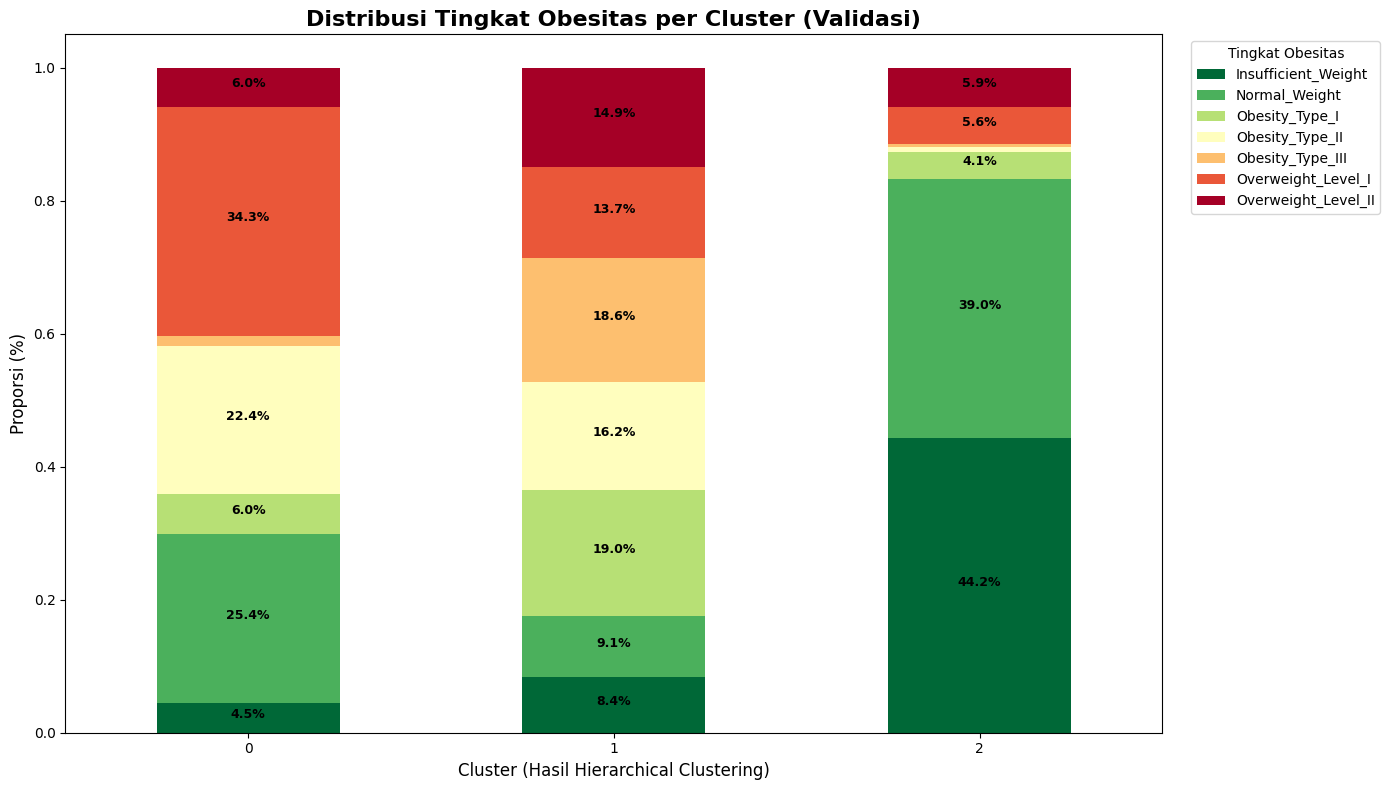

In [18]:
cross_tab = pd.crosstab(df['Cluster'], df['NObeyesdad'], normalize='index')
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='RdYlGn_r')

plt.title('Distribusi Tingkat Obesitas per Cluster (Validasi)', fontsize=16, fontweight='bold')
plt.xlabel('Cluster (Hasil Hierarchical Clustering)', fontsize=12)
plt.ylabel('Proporsi (%)', fontsize=12)
plt.legend(title='Tingkat Obesitas', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0)

# 3. Menambahkan Label Persentase di tengah batang
for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab.loc[x], cross_tab.loc[x].cumsum()):
        # Hanya tampilkan angka jika proporsinya cukup besar (> 2%) biar gak numpuk
        if proportion > 0.02: 
            plt.text(x=n,
                     y=(y_loc - proportion) + (proportion / 2),
                     s=f'{np.round(proportion * 100, 1)}%', 
                     color="black",
                     fontsize=9,
                     fontweight="bold", 
                     ha="center")

plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

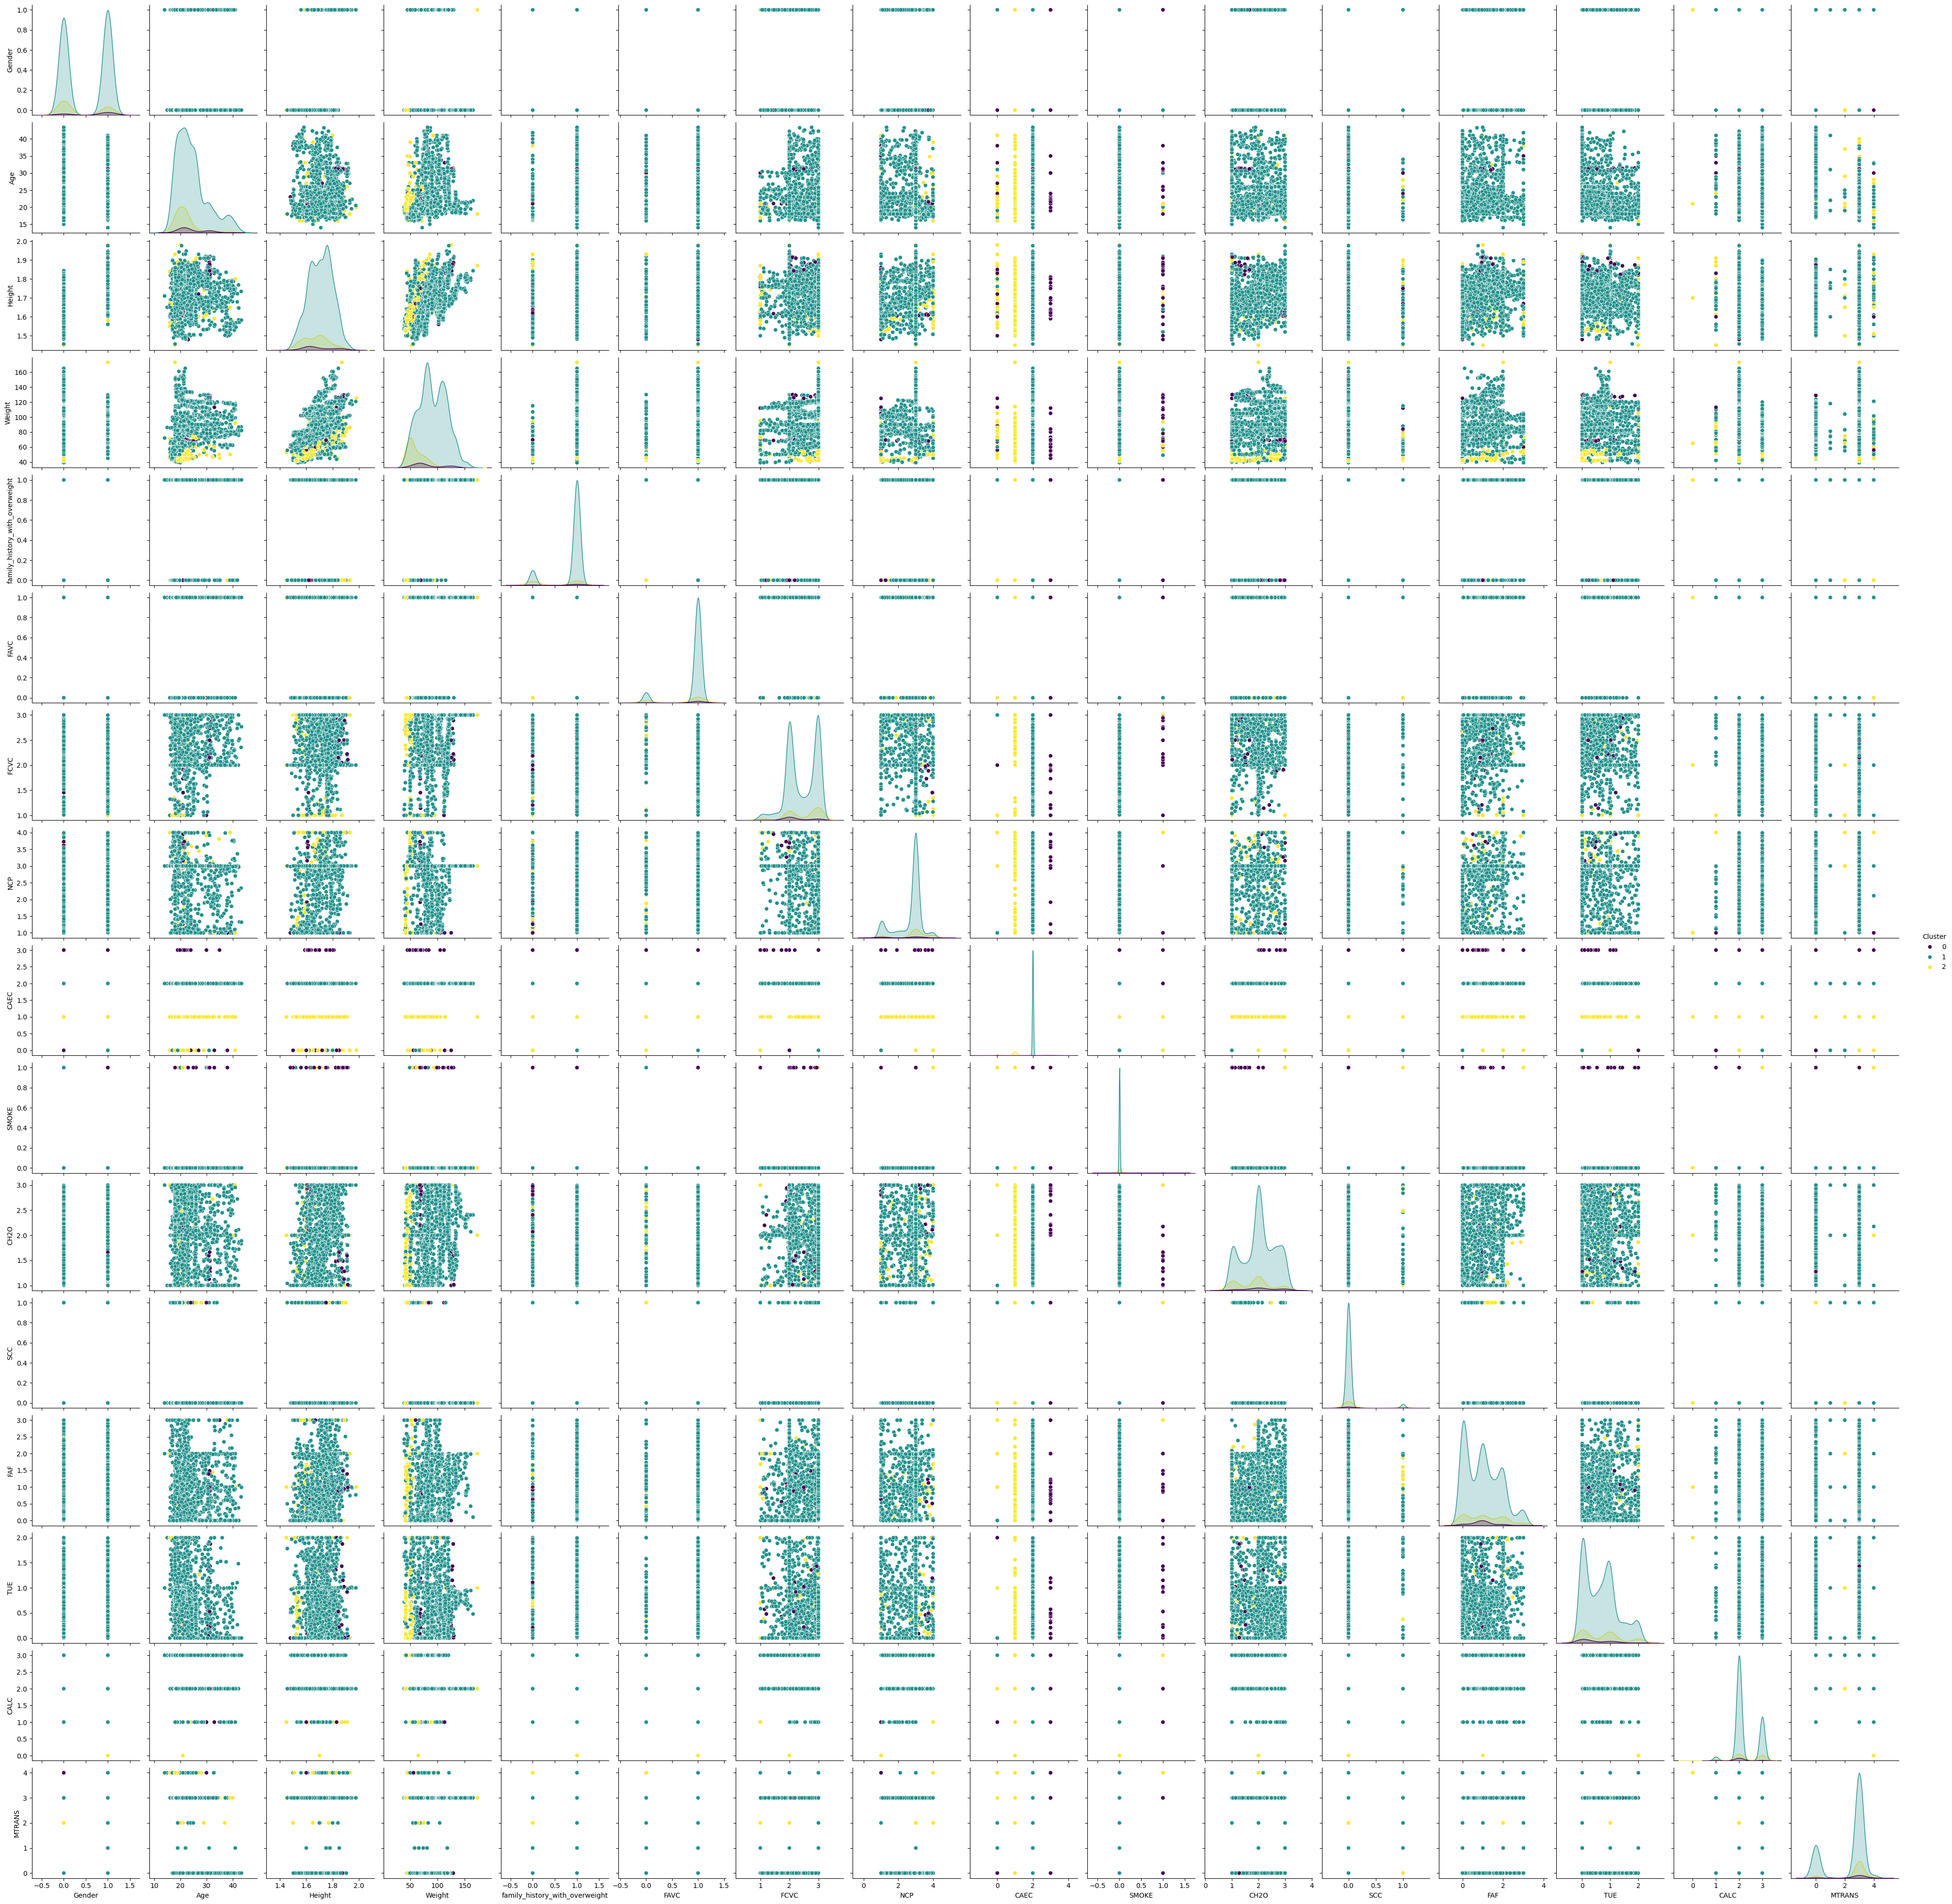

In [19]:
plt.figure(figsize=(10,8))
sns.pairplot(df, hue="Cluster", palette="viridis")
plt.show()

/var/folders/wm/v47lypj90l1gqzsfzt6rzn2c0000gn/T/ipykernel_25137/2937795917.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  my_palette = plt.cm.get_cmap("Set2", len(cluster_mean.index))


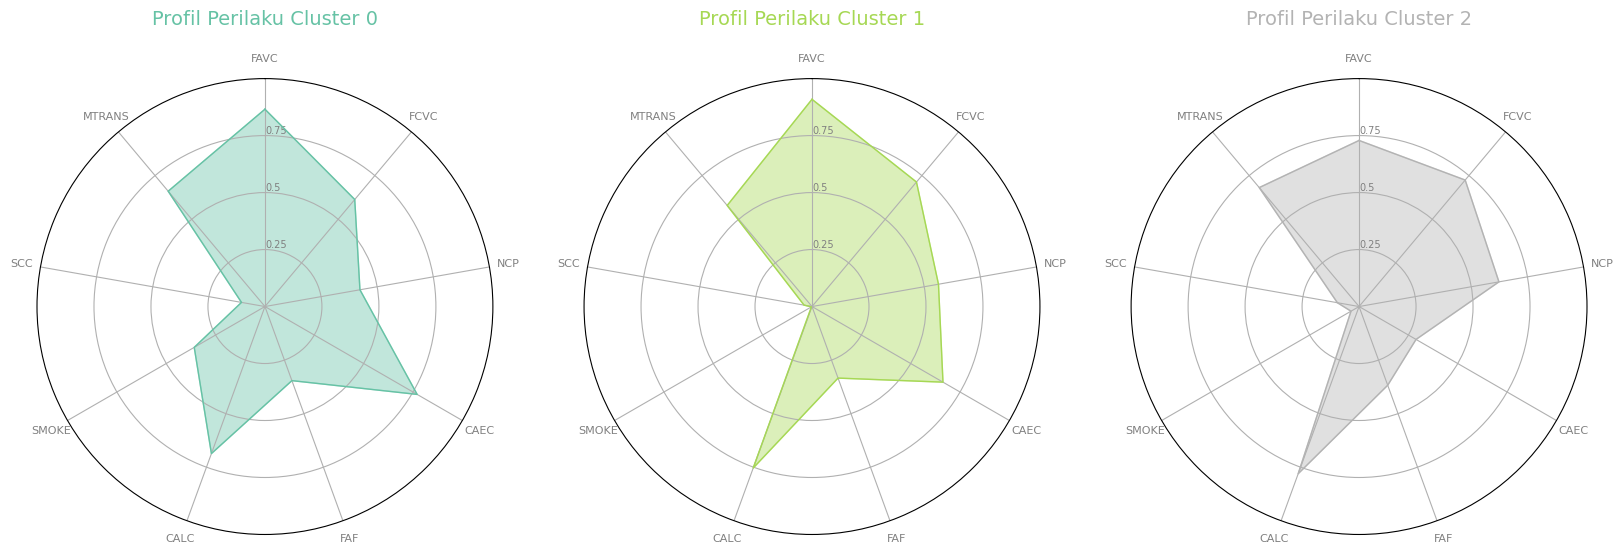

In [22]:
features_radar = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'FAF', 'CALC', "SMOKE", "SCC", "MTRANS"]

# 2. Normalisasi Data dulu (PENTING!)
# Agar skala 'Makan Sayur' (1-3) bisa dibandingkan dengan 'Olahraga' (0-3) dalam satu grafik
scaler = MinMaxScaler()
df_radar_scaled = df.copy()
df_radar_scaled[features_radar] = scaler.fit_transform(df[features_radar])

# 3. Hitung Rata-rata per Cluster
cluster_mean = df_radar_scaled.groupby('Cluster')[features_radar].mean().reset_index()

# 4. Fungsi Membuat Radar Chart
def make_spider(row, title, color):
    categories = list(cluster_mean.columns[1:])
    N = len(categories)
    
    # Sudut sumbu
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(1, 3, row+1, polar=True) # Ganti (1, 3) sesuai jumlah clustermu (misal 3)
    
    # Set sumbu pertama di atas
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Label Sumbu
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Label Y (Jarak dari tengah)
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25","0.5","0.75"], color="grey", size=7)
    plt.ylim(0, 1)
    
    # Data
    values = cluster_mean.loc[row].drop('Cluster').values.flatten().tolist()
    values += values[:1]
    
    # Plot
    ax.plot(angles, values, linewidth=1, linestyle='solid', color=color)
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.title(title, size=14, color=color, y=1.1)

# --- EKSEKUSI PLOT ---
plt.figure(figsize=(20, 6))
my_palette = plt.cm.get_cmap("Set2", len(cluster_mean.index))

for i in range(len(cluster_mean.index)):
    make_spider(row=i, title=f'Profil Perilaku Cluster {i}', color=my_palette(i))

plt.show()

# Interpretasi Profil Perilaku (Radar Chart)

**1. Cluster 0: Kelompok Sedentari (Risiko Tinggi)**
Cluster ini mencerminkan gaya hidup pasif yang didominasi oleh tingginya penggunaan teknologi (TUE) dan rendahnya aktivitas fisik (FAF), disertai kebiasaan sering mengemil (CAEC). Kurangnya pembakaran energi membuat kelompok ini memiliki risiko tertinggi mengalami obesitas tingkat lanjut (Tipe II dan III).

**2. Cluster 1: Kelompok Aktif (Sehat)**
Cluster ini mewakili gaya hidup sehat dengan tingkat aktivitas fisik (FAF) yang paling tinggi dan konsumsi sayuran (FCVC) yang baik. Kebiasaan aktif ini terbukti menjadi faktor utama yang menjaga anggota kelompok ini tetap berada pada berat badan normal dan terhindar dari risiko obesitas.

**3. Cluster 2: Kelompok Diet Tinggi Kalori (Risiko Moderat)**
Cluster ini ditandai dengan pola makan yang buruk, yaitu sering mengonsumsi makanan tinggi kalori (FAVC) dan frekuensi makan utama yang tinggi (NCP). Meskipun aktivitas fisik mereka tidak serendah Cluster 0, asupan kalori yang berlebihan tetap mendorong berat badan mereka naik ke level Overweight hingga Obesitas Tipe I.

**Kesimpulan:**
Hasil clustering menunjukkan bahwa **kurangnya aktivitas fisik (sedentari) memiliki dampak yang lebih berbahaya** terhadap tingkat keparahan obesitas dibandingkan sekadar pola makan tinggi kalori.